In [1]:
%matplotlib inline

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.table import join
from desitarget.targets import desi_mask
from collections import Counter

In [67]:
truth_file = "/home/forero/Data/desitest/mtl/truth.fits"
sky_file = "/home/forero/Data/desitest/mtl/sky.fits"
star_file =  "/home/forero/Data/desitest/mtl/stdstars.fits"

truth = Table.read(truth_file)
sky = Table.read(sky_file)
star = Table.read(star_file)
true_types = list(set(truth['TRUETYPE']))

In [78]:
for j in range(5):
    mtl_file = "/home/forero/Data/desitest/lowfat/{}/mtl.fits".format(j)
    mtl = Table.read(mtl_file)
    ii = (mtl['DESI_TARGET'] & desi_mask.QSO) != 0
    len(ii)
#    print set(mtl['NUMOBS_MORE'][ii])
    print Counter(mtl['NUMOBS_MORE'][ii])

Counter({4: 253526})
Counter({1: 195566, 2: 16795, 3: 14517, 4: 6227})
Counter({1: 162907, 2: 16222, 3: 12977, 4: 4804})
Counter({1: 142453, 2: 14606, 3: 13428, 4: 3998})
Counter({1: 128226, 3: 13913, 2: 13323, 4: 3441})


In [75]:
ii = (mtl['DESI_TARGET'] & desi_mask.QSO) != 0
len(ii)
print set(mtl['NUMOBS_MORE'][ii])
Counter(mtl['NUMOBS_MORE'][ii])

set([1, 2, 3, 4])


In [77]:
Counter(mtl['NUMOBS_MORE'][ii])

Counter({1: 195566, 2: 16795, 3: 14517, 4: 6227})

In [ ]:
mtl_file = "/home/forero/Data/desitest/lowfat/1/mtl.fits"
mtl = Table.read(mtl_file)
mtl.colnames

In [79]:
n_epoch = 6

print("TARGETTING EFFICIENCIES")
print("=======================")

for epoch in range(n_epoch):
    zcat_file = "/home/forero/Data/desitest/lowfat_serial/{}/zcat.fits".format(epoch)
    zcat = Table.read(zcat_file)
    print('Epoch {}'.format(epoch))
    for true_type in true_types:
        ii = (zcat['TYPE'] == true_type)
        jj = (truth['TRUETYPE'] == true_type)
        n_obs  = 1.0 * len(zcat['Z'][ii])
        n_total = 1.0 * len(truth['TRUEZ'][jj])
        print("\t {} : {}".format(true_type, n_obs/n_total))

TARGETTING EFFICIENCIES
Epoch 0
	 STAR : 0.555801493791
	 QSO : 0.556151316585
	 GALAXY : 0.153690492614
	 UNKNOWN : 0.502025123872
Epoch 1
	 STAR : 0.641410701719
	 QSO : 0.640925357255
	 GALAXY : 0.312227939912
	 UNKNOWN : 0.594276198113
Epoch 2
	 STAR : 0.692705850303
	 QSO : 0.693419493677
	 GALAXY : 0.407757622029
	 UNKNOWN : 0.650013363762
Epoch 3
	 STAR : 0.726690730777
	 QSO : 0.728268491428
	 GALAXY : 0.472974183465
	 UNKNOWN : 0.688459877876
Epoch 4
	 STAR : 0.726690730777
	 QSO : 0.728268491428
	 GALAXY : 0.530594511648
	 UNKNOWN : 0.688459877876
Epoch 5
	 STAR : 0.985130195918
	 QSO : 0.984567304205
	 GALAXY : 0.700053481292
	 UNKNOWN : 0.880384053948


In [80]:
n_epoch = 6

print("TARGETTING EFFICIENCIES")
print("=======================")

for epoch in range(n_epoch):
    zcat_file = "/home/forero/Data/desitest/lowfat/{}/zcat.fits".format(epoch)
    zcat = Table.read(zcat_file)
    print('Epoch {}'.format(epoch))
    for true_type in true_types:
        ii = (zcat['TYPE'] == true_type)
        jj = (truth['TRUETYPE'] == true_type)
        n_obs  = 1.0 * len(zcat['Z'][ii])
        n_total = 1.0 * len(truth['TRUEZ'][jj])
        print("\t {} : {}".format(true_type, n_obs/n_total))

TARGETTING EFFICIENCIES
Epoch 0
	 STAR : 0.713875456878
	 QSO : 0.713627680925
	 GALAXY : 0.137845289772
	 UNKNOWN : 0.475708793355
Epoch 1
	 STAR : 0.778610184113
	 QSO : 0.778713397974
	 GALAXY : 0.296597418158
	 UNKNOWN : 0.596722794465
Epoch 2
	 STAR : 0.81665872097
	 QSO : 0.817255845443
	 GALAXY : 0.396587780186
	 UNKNOWN : 0.669359978618
Epoch 3
	 STAR : 0.841188222207
	 QSO : 0.841864738738
	 GALAXY : 0.468469282274
	 UNKNOWN : 0.71411830013
Epoch 4
	 STAR : 0.841188222207
	 QSO : 0.841864738738
	 GALAXY : 0.545164100636
	 UNKNOWN : 0.71411830013
Epoch 5
	 STAR : 0.984846421031
	 QSO : 0.98439804628
	 GALAXY : 0.69995521178
	 UNKNOWN : 0.878636485125


In [52]:
import glob
tile_files = glob.glob('/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile*.fits')
print len(tile_files)

144


In [61]:
fiberdata = Table.read(tile_files[0], hdu=1)
print fiberdata.colnames
print truth.colnames
print zcat.colnames

['FIBER', 'POSITIONER', 'NUMTARGET', 'PRIORITY', 'TARGETID', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'RA', 'DEC', 'XFOCAL_DESIGN', 'YFOCAL_DESIGN']
['TARGETID', 'BRICKNAME', 'RA', 'DEC', 'TRUEZ', 'TRUETYPE', 'CATEGORY']
['TARGETID', 'BRICKNAME', 'Z', 'TYPE', 'NUMOBS', 'ZERR', 'ZWARN']


In [66]:
targets = list(set(fiberdata['DESI_TARGET']))
print np.log(targets)/np.log(2), targets

[ 32.   0.   1.   2.  33. -inf] [4294967296, 1, 2, 4, 8589934592, 0]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [43]:
n_tiles = 20
n_star_all = []
n_sky_all = []
n_targets_all = []
for i in range(n_tiles):
    print tile_files[i]
    fiberdata = Table.read(tile_files[i], hdu=1)
    n_star = len(set(fiberdata['TARGETID']) & set(star['TARGETID']))
    n_sky = len(set(fiberdata['TARGETID']) & set(sky['TARGETID']))
    n_targets = len(set(fiberdata['TARGETID']) & set(truth['TARGETID']))
    n_star_all.append(n_star)
    n_sky_all.append(n_sky)
    n_targets_all.append(n_targets)

/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02791.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02802.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05394.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05469.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05425.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02780.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_03394.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05429.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05420.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_00139.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02763.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05461.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02814.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05391.fits
/home/

In [44]:
print n_targets_all
print n_sky_all
print n_star_all

[4489, 4489, 4485, 4490, 4493, 4491, 2103, 4491, 4490, 2248, 4494, 4488, 4492, 2250, 4488, 4482, 4490, 4490, 4490, 2247]
[400, 400, 400, 400, 400, 400, 201, 400, 400, 202, 400, 400, 400, 202, 400, 400, 400, 400, 400, 204]
[100, 100, 100, 100, 100, 100, 50, 100, 100, 50, 100, 100, 100, 50, 100, 100, 100, 100, 100, 50]


In [47]:
 fiberdata = Table.read(tile_files[6], hdu=1)

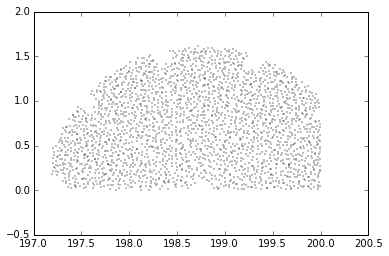

In [48]:
ii = (fiberdata['TARGETID'] >= 0)
plt.scatter(fiberdata['RA'][ii], fiberdata['DEC'][ii], s=0.1)